# SVM for classification

Load IRIS dataset, check its contents:


In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [8]:
import numpy as np  # Import the NumPy library for array manipulation

# Select only the first two columns of X
X_new = X[:, :2]

# Create a mask to exclude samples where y is equal to 2
mask = y != 2

# Apply the mask to keep only the relevant data
X_binary = X_new[mask]
y_binary = y[mask]

# Print the shape of the new dataset
print(X_binary.shape)

# Check the unique values remaining in y after filtering
print(np.unique(y_binary))

(100, 2)
[0 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

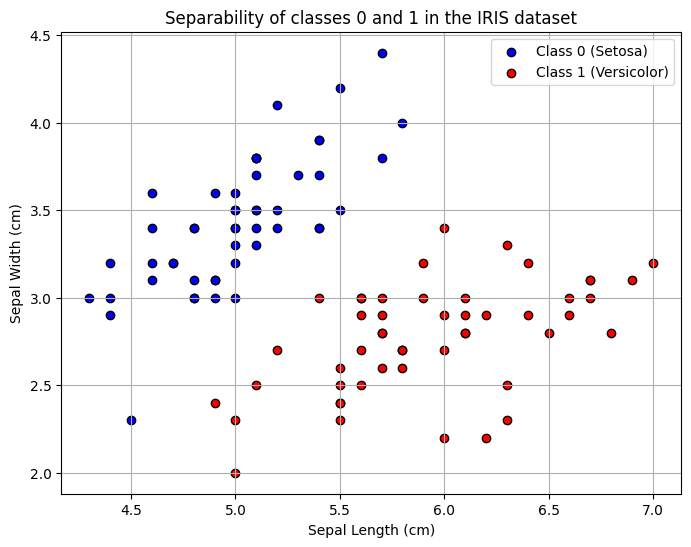

In [9]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Separate the data points based on their class labels
class_0 = X_binary[y_binary == 0]  # Extract samples belonging to class 0 (Setosa)
class_1 = X_binary[y_binary == 1]  # Extract samples belonging to class 1 (Versicolor)

# Create a scatter plot to visualize the two classes
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0 (Setosa)', edgecolors='k')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (Versicolor)', edgecolors='k')

# Add axis labels and a title for better readability
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Separability of classes 0 and 1 in the IRIS dataset")

# Add a legend and a grid to improve visualization
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train and evaluate an SVM model with different values of C
for C in [1, 10, 200]:
    model = SVC(kernel='linear', C=C).fit(X_train, y_train)  # Train the SVM with a linear kernel
    accuracy = accuracy_score(y_test, model.predict(X_test))  # Evaluate accuracy on the test set
    print(f"C={C} -> Accuracy: {accuracy:.4f}")  # Print the accuracy for each C value

C=1 -> Accuracy: 1.0000
C=10 -> Accuracy: 1.0000
C=200 -> Accuracy: 1.0000


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

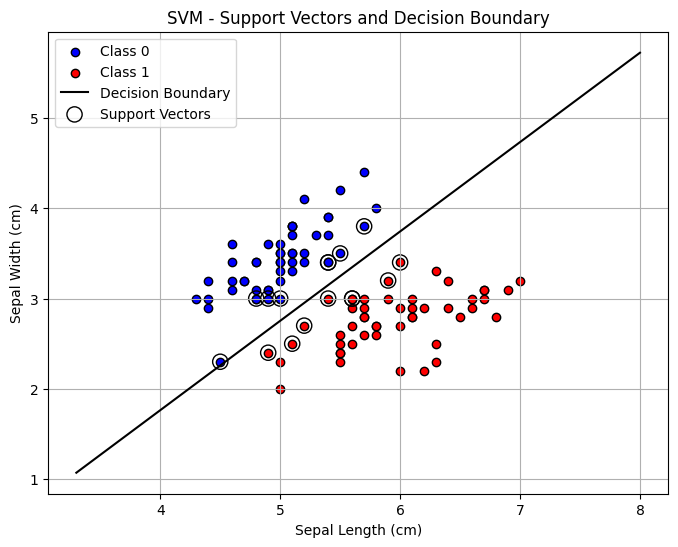

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Train an SVM model with a linear kernel and C=1
SVMmodel = SVC(kernel='linear', C=1)
SVMmodel.fit(X_binary, y_binary)  # Fit the model to the binary dataset

# Get the support vectors (the most important points for defining the decision boundary)
supvectors = SVMmodel.support_vectors_

# Extract model parameters (weights and intercept)
W = SVMmodel.coef_[0]  # [w0, w1] - the coefficients of the decision boundary
b = SVMmodel.intercept_[0]  # Bias term

# Define the range for plotting the decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)  # Generate x-values for plotting
yy = -(W[0] * xx + b) / W[1]  # Compute corresponding y-values for the decision boundary

# Create the plot
plt.figure(figsize=(8, 6))

# Plot Class 0 (blue) and Class 1 (red) data points
plt.scatter(X_binary[y_binary == 0][:, 0], X_binary[y_binary == 0][:, 1], color='blue', label='Class 0', edgecolors='k')
plt.scatter(X_binary[y_binary == 1][:, 0], X_binary[y_binary == 1][:, 1], color='red', label='Class 1', edgecolors='k')

# Plot the decision boundary (black line)
plt.plot(xx, yy, 'k-', label="Decision Boundary")

# Highlight the support vectors (circled points)
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=120, facecolors='none', edgecolors='k', label="Support Vectors")

# Add axis labels, legend, grid, and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.title("SVM - Support Vectors and Decision Boundary")

# Show the plot
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

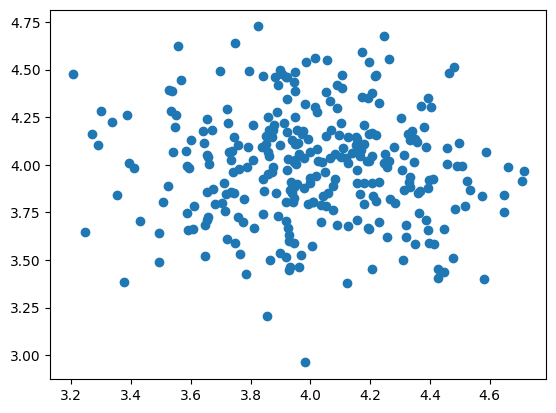

In [13]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

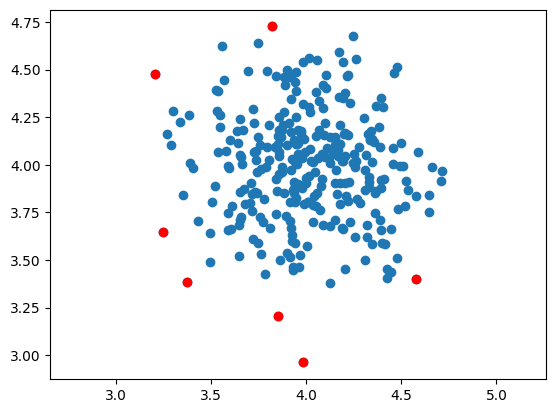

In [14]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

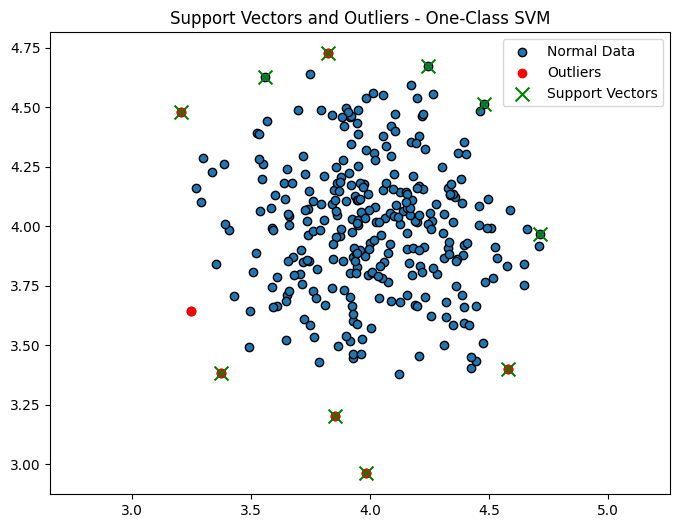

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs

# Generate synthetic data: a single Gaussian cluster centered at (4,4)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.3, center_box=(4, 4), random_state=11)

# Train a One-Class SVM model for anomaly detection
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)  # Fit the model to the data

# Extract the support vectors (key points influencing the decision function)
support_vectors = SVMmodelOne.support_vectors_

# Predict anomalies (-1 for outliers, 1 for normal points)
pred = SVMmodelOne.predict(x)
anom_index = np.where(pred == -1)  # Find indices of detected outliers
values = x[anom_index]  # Extract outlier points

# Create the plot
plt.figure(figsize=(8, 6))

# Plot normal data points (default color)
plt.scatter(x[:, 0], x[:, 1], label="Normal Data", edgecolors='k')

# Highlight outliers in red
plt.scatter(values[:, 0], values[:, 1], color='red', label="Outliers")

# Mark support vectors with green Xs
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='x', s=100, label="Support Vectors")

# Set equal axis proportions for better visualization
plt.axis('equal')
plt.legend()
plt.title("Support Vectors and Outliers - One-Class SVM")

# Show the plot
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


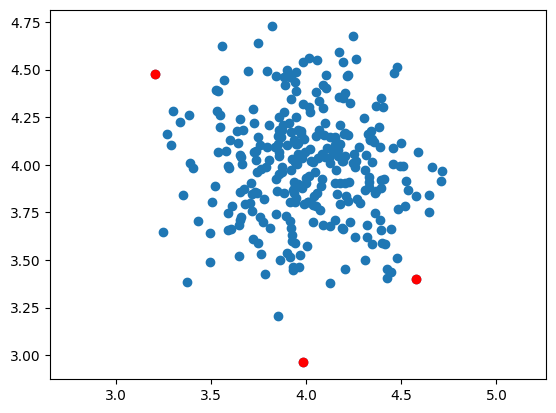

In [16]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()